In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread(r'C:\Users\KIIT\Downloads\kohli.jpg')

In [3]:
img.shape

(260, 260, 3)

In [4]:
# Every image has a 3 dimension, x and y coordinates and third one is RGB representation

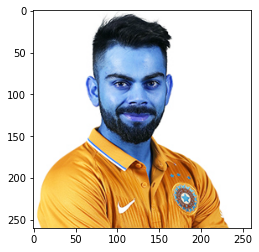

In [5]:
plt.imshow(img)

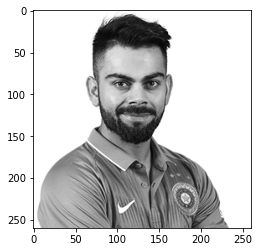

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('Grayscale', gray)
plt.imshow(gray,cmap = 'gray')

In [7]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\KIIT\Documents\DataScience_Projects\Celebrity_Class\opencv\haarcascade\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\KIIT\Downloads\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(img,1.3,5)
faces

array([[ 68,  43, 111, 111]], dtype=int32)

In [8]:
x,y,w,h = faces[0]

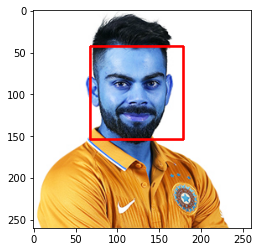

In [9]:
face_img = cv2.rectangle(img, (x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

In [10]:
eyes = eye_cascade.detectMultiScale(face_img,1.3,5)
eyes

array([[129,  76,  23,  23],
       [ 92,  76,  26,  26]], dtype=int32)

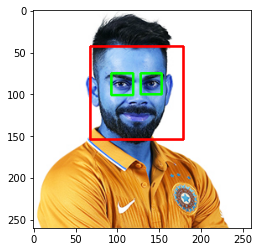

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h,x:x+w]
    roi_color = face_img[y:y+h,x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes : 
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap = 'gray')
plt.show()

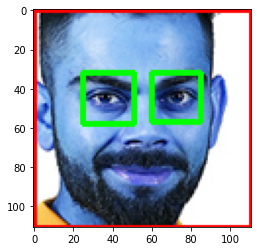

In [12]:
plt.imshow(roi_color,cmap = 'gray')

In [13]:
type(roi_color)

numpy.ndarray

In [14]:
def get_cropped_img_if_2_eyes(img_path):
    img = cv2.imread(img_path)
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(img,1.3,5)
    for (x,y,w,h) in faces:
#         roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_color)
        if len(eyes) >= 2:
            return roi_color

In [15]:
cropped_img = get_cropped_img_if_2_eyes(r'C:\Users\KIIT\Downloads\kohli.jpg')

In [16]:
type(cropped_img)

numpy.ndarray

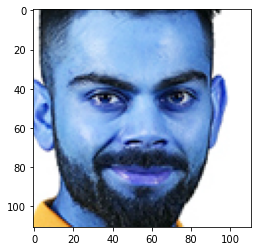

In [17]:
plt.imshow(cropped_img)

In [18]:
path_to_data = './Datasets/'
path_to_cr_data = './Datasets/Cropped/'

In [19]:
import os

img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./Datasets/LioneMessi',
 './Datasets/MariaSharapova',
 './Datasets/RogerFedrer',
 './Datasets/SerenaWilliams',
 './Datasets/ViratKohli']

In [21]:
import shutil

if os.path.exists(path_to_cr_data):
    os.rmdir(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [22]:
for cel_names in img_dirs:
    celebrity = cel_names.split('/')[-1]
    print(celebrity)

LioneMessi
MariaSharapova
RogerFedrer
SerenaWilliams
ViratKohli


In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

LioneMessi
Generating cropped images in folder:  ./Datasets/Cropped/LioneMessi
MariaSharapova
Generating cropped images in folder:  ./Datasets/Cropped/MariaSharapova
RogerFedrer
Generating cropped images in folder:  ./Datasets/Cropped/RogerFedrer
SerenaWilliams
Generating cropped images in folder:  ./Datasets/Cropped/SerenaWilliams
ViratKohli
Generating cropped images in folder:  ./Datasets/Cropped/ViratKohli


In [24]:
celebrity_file_names_dict

{'LioneMessi': ['./Datasets/Cropped/LioneMessi/LioneMessi1.png',
  './Datasets/Cropped/LioneMessi/LioneMessi2.png',
  './Datasets/Cropped/LioneMessi/LioneMessi3.png',
  './Datasets/Cropped/LioneMessi/LioneMessi4.png',
  './Datasets/Cropped/LioneMessi/LioneMessi5.png',
  './Datasets/Cropped/LioneMessi/LioneMessi6.png',
  './Datasets/Cropped/LioneMessi/LioneMessi7.png',
  './Datasets/Cropped/LioneMessi/LioneMessi8.png',
  './Datasets/Cropped/LioneMessi/LioneMessi9.png',
  './Datasets/Cropped/LioneMessi/LioneMessi10.png',
  './Datasets/Cropped/LioneMessi/LioneMessi11.png',
  './Datasets/Cropped/LioneMessi/LioneMessi12.png',
  './Datasets/Cropped/LioneMessi/LioneMessi13.png',
  './Datasets/Cropped/LioneMessi/LioneMessi14.png',
  './Datasets/Cropped/LioneMessi/LioneMessi15.png',
  './Datasets/Cropped/LioneMessi/LioneMessi16.png',
  './Datasets/Cropped/LioneMessi/LioneMessi17.png',
  './Datasets/Cropped/LioneMessi/LioneMessi18.png',
  './Datasets/Cropped/LioneMessi/LioneMessi19.png',
  './Da

In [25]:
# Extracting the image through wavelet transform

In [26]:
# Thanks to Stackoverflow

import numpy as np
import pywt
def w2d(img, mode = "haar", level = 1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0
    
    imArray_H = pywt.waverec2(coeffs_H,mode)
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

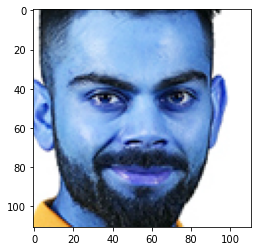

In [27]:
plt.imshow(cropped_img)

In [28]:
im_har = w2d(cropped_img)

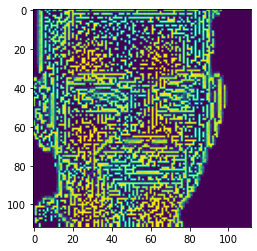

In [29]:
plt.imshow(im_har)

In [30]:
np.shape(cropped_img)

(111, 111, 3)

In [31]:
np.shape(im_har)

(112, 112)

In [32]:
class_dict = {
    'LioneMessi' : 0,
    'MariaSharapova' : 1,
    'RogerFedrer' : 2,
    'SerenaWilliams' : 3,
    'ViratKohli' : 4
}

In [33]:
x = []
y = []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_img in training_files:
        img = cv2.imread(training_img)
        scalled_raw_img = cv2.resize(img,(32,32))
        im_har = w2d(scalled_raw_img,'db1',5)
        scalled_har_img = cv2.resize(im_har,(32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_har_img.reshape(32*32,1)))
        x.append(combined_img)
        y.append(class_dict[celebrity_name])

In [37]:
print(len(x))
print(len(x))

218
218


In [38]:
len(x[0])

4096

In [41]:
x = np.array(x).reshape(len(x),4096).astype(float)
x.shape

(218, 4096)

In [40]:
x

array([[  9.,  18.,  28., ..., 227., 208., 211.],
       [ 29.,  33.,  30., ..., 203., 200., 197.],
       [ 36.,  48.,  67., ..., 191., 242.,  15.],
       ...,
       [ 39.,   0.,   7., ..., 141., 146., 139.],
       [ 61.,  89., 100., ..., 235., 231., 225.],
       [152., 150., 115., ...,  39.,  21.,  87.]])

In [57]:
y = np.array(y)
y.shape

(218,)

## Data cleaning process is done...
### Now we will try to create the best fit model

In [64]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [97]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.1)

In [98]:
model = SVC(C = 10)

In [99]:
model.fit(x_train,y_train)

SVC(C=10)

In [100]:
y_train.shape

(196,)

In [101]:
model.score(x_test,y_test)

0.7272727272727273

In [104]:
pipe = Pipeline([('scaler',StandardScaler()), ('svc',SVC(kernel = 'rbf',C=10))])

In [105]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=10))])

In [106]:
pipe.score(x_test,y_test)

0.7272727272727273

## Let's use GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [107]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [108]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [109]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.790641,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.643077,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.806282,{'logisticregression__C': 1}


In [112]:
best_estimators['logistic_regression'].score(x_test,y_test)

0.8636363636363636

In [113]:
best_clf = best_estimators['logistic_regression']

In [115]:
from sklearn.metrics import confusion_matrix

In [119]:
cm  = confusion_matrix(y_test,best_clf.predict(x_test))
cm

array([[4, 0, 0, 0, 0],
       [0, 9, 0, 0, 0],
       [1, 1, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 4]], dtype=int64)

Text(33.0, 0.5, 'Truth')

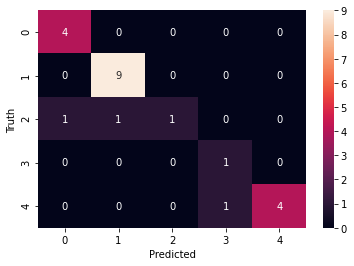

In [121]:
import seaborn as sns
sns.heatmap(cm,annot = True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [122]:
import pickle

In [123]:
# import pickle
# with open('Banglore_Price_Model','wb') as f:
#     pickle.dump(model,f)

In [124]:
with open('Celebrity_Model','wb') as f:
    pickle.dump(best_clf,f)

In [127]:
import json
with open('class_dictionary.json','w') as f:
    f.write(json.dumps(class_dict))

In [130]:
with open('Celebrity_Model','rb') as f:
    model1 = pickle.load(f)

In [131]:
model1.predict(x_test)

array([2, 0, 0, 3, 4, 1, 0, 1, 0, 1, 1, 1, 1, 0, 3, 4, 1, 4, 4, 1, 1, 1])